In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Any results you write to the current directory are saved as output.

In [2]:
data = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv', index_col=0)

print(data.head())
#print(data.head())
#print(data.iloc[:,2])
print('in totale ci sono {} righe'.format(data.iloc[:,0].value_counts().sum()))

print(data.describe())
print('\n')
print(data.isnull().sum()) #no null values
#data['Date'] = data['Date'].apply(lambda x : int(x))

                  SPX        GLD        USO     SLV   EUR/USD
Date                                                         
1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
in totale ci sono 2290 righe
               SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303296
75%    2073.010070   132.840004    37.82

In [3]:
label = data.iloc[:,1]
data.drop(data.columns[1], axis=1, inplace=True)

print(label)



Date
1/2/2008      84.860001
1/3/2008      85.570000
1/4/2008      85.129997
1/7/2008      84.769997
1/8/2008      86.779999
                ...    
5/8/2018     124.589996
5/9/2018     124.330002
5/10/2018    125.180000
5/14/2018    124.489998
5/16/2018    122.543800
Name: GLD, Length: 2290, dtype: float64


In [4]:
train_data,  test_data, train_label, test_label =  train_test_split(data, label, test_size=0.1)

print('train data has {} righe'.format(train_data.iloc[:,0].value_counts().sum()))
print('test data has {} righe'.format(train_label.size))

#train_data.drop(train_data.iloc[0,:], axis=1, inplace=True)

# print('train_data: \n')
# print(train_data.shape)
# print('train_label: \n')
# print(train_label.shape)


# print('test_data: \n')
# print(test_data.shape)
# print('test_label: \n')
# print(test_label.shape)

print(test_data)
print(test_label)

train data has 2061 righe
test data has 2061 righe
                    SPX        USO        SLV   EUR/USD
Date                                                   
10/3/2016   2161.199951  11.100000  17.870001  1.121039
3/3/2010    1118.790039  39.400002  16.820000  1.370163
10/2/2008   1114.280029  75.820000  10.800000  1.378493
3/7/2016    2001.760010  10.110000  14.900000  1.099396
9/27/2012   1447.150024  34.150002  33.580002  1.291322
...                 ...        ...        ...       ...
2/28/2011   1327.219971  39.189999  33.110001  1.373438
4/2/2008    1367.530029  83.779999  17.246000  1.566711
12/1/2014   2053.439941  26.320000  15.780000  1.243828
4/27/2011   1355.660034  45.020000  47.000000  1.478000
11/14/2014  2039.819946  28.830000  15.630000  1.247598

[229 rows x 4 columns]
Date
10/3/2016     125.320000
3/3/2010      111.629997
10/2/2008      82.330002
3/7/2016      121.139999
9/27/2012     172.339996
                 ...    
2/28/2011     137.660004
4/2/2008       89

In [5]:
print(train_label)

Date
5/5/2016      122.070000
8/13/2009      93.720001
2/6/2009       89.589996
4/20/2015     114.720001
7/20/2009      93.279999
                 ...    
2/9/2012      168.020004
11/9/2012     167.820007
8/12/2014     125.989998
4/28/2009      87.750000
11/19/2010    132.199997
Name: GLD, Length: 2061, dtype: float64


In [6]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(4))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1024))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(2048))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1024))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(256))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(16))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))

model.add(keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

In [7]:
print(train_data.iloc[:,0].value_counts().sum())

#train_data.drop(train_data.columns[0], axis=1, inplace=True)

print(np.array(train_data).shape)
print(np.array(train_label).size)

print(train_data.head())


2061
(2061, 4)
2061
                   SPX        USO    SLV   EUR/USD
Date                                              
5/5/2016   2050.629883  10.900000  16.51  1.140602
8/13/2009  1012.729980  37.799999  14.79  1.420697
2/6/2009    868.599976  28.200001  12.91  1.292708
4/20/2015  2100.399902  19.889999  15.29  1.074749
7/20/2009   951.130005  34.830002  13.45  1.419850


In [8]:
print(train_data.head())


model.fit(np.array(train_data), np.array(train_label), epochs=500)

                   SPX        USO    SLV   EUR/USD
Date                                              
5/5/2016   2050.629883  10.900000  16.51  1.140602
8/13/2009  1012.729980  37.799999  14.79  1.420697
2/6/2009    868.599976  28.200001  12.91  1.292708
4/20/2015  2100.399902  19.889999  15.29  1.074749
7/20/2009   951.130005  34.830002  13.45  1.419850
Epoch 1/500
2061/2061 [==============================] - 4s 2ms/sample - loss: 122.3302 - mean_absolute_error: 122.3302
Epoch 2/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 121.5234 - mean_absolute_error: 121.5234
Epoch 3/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 120.7767 - mean_absolute_error: 120.7767
Epoch 4/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 119.9660 - mean_absolute_error: 119.9660
Epoch 5/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 119.0422 - mean_absolute_error: 119.0422
Epoch 6/500
2061/2061 [====================

2061/2061 [==============================] - 3s 1ms/sample - loss: 6.7573 - mean_absolute_error: 6.7573
Epoch 68/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.6700 - mean_absolute_error: 6.6700
Epoch 69/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.8503 - mean_absolute_error: 6.8503
Epoch 70/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.5803 - mean_absolute_error: 6.5803
Epoch 71/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.4342 - mean_absolute_error: 6.4342
Epoch 72/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.4522 - mean_absolute_error: 6.4522
Epoch 73/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.3956 - mean_absolute_error: 6.3956
Epoch 74/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 6.4416 - mean_absolute_error: 6.4416
Epoch 75/500
2061/2061 [==============================] - 3s 1ms/sample - los

2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8179 - mean_absolute_error: 4.8179
Epoch 137/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8530 - mean_absolute_error: 4.8530
Epoch 138/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8254 - mean_absolute_error: 4.8254
Epoch 139/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.9013 - mean_absolute_error: 4.9013
Epoch 140/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8381 - mean_absolute_error: 4.8381
Epoch 141/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.6746 - mean_absolute_error: 4.6746
Epoch 142/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.8099 - mean_absolute_error: 4.8099
Epoch 143/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.7815 - mean_absolute_error: 4.7815
Epoch 144/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 4.3264 - mean_absolute_error: 4.3264
Epoch 206/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.0586 - mean_absolute_error: 4.0586
Epoch 207/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.0070 - mean_absolute_error: 4.0070
Epoch 208/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.1472 - mean_absolute_error: 4.1472
Epoch 209/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.0608 - mean_absolute_error: 4.0608
Epoch 210/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.9760 - mean_absolute_error: 3.9760
Epoch 211/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 4.2814 - mean_absolute_error: 4.2814
Epoch 212/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.9805 - mean_absolute_error: 3.9805
Epoch 213/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.7739 - mean_absolute_error: 3.7739
Epoch 275/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8698 - mean_absolute_error: 3.8698
Epoch 276/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8468 - mean_absolute_error: 3.8468
Epoch 277/500
2061/2061 [==============================] - 3s 2ms/sample - loss: 3.7429 - mean_absolute_error: 3.7429
Epoch 278/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.9016 - mean_absolute_error: 3.9016
Epoch 279/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.7331 - mean_absolute_error: 3.7331
Epoch 280/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.7323 - mean_absolute_error: 3.7323
Epoch 281/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.8311 - mean_absolute_error: 3.8311
Epoch 282/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.5423 - mean_absolute_error: 3.5423
Epoch 344/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.4430 - mean_absolute_error: 3.4430
Epoch 345/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.5607 - mean_absolute_error: 3.5607
Epoch 346/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.5055 - mean_absolute_error: 3.5055
Epoch 347/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.5649 - mean_absolute_error: 3.5649
Epoch 348/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.6036 - mean_absolute_error: 3.6036
Epoch 349/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.3829 - mean_absolute_error: 3.3829
Epoch 350/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.5204 - mean_absolute_error: 3.5204
Epoch 351/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1292 - mean_absolute_error: 3.1292
Epoch 413/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0586 - mean_absolute_error: 3.0586
Epoch 414/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0749 - mean_absolute_error: 3.0749
Epoch 415/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0660 - mean_absolute_error: 3.0660
Epoch 416/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1027 - mean_absolute_error: 3.1027
Epoch 417/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1663 - mean_absolute_error: 3.1663
Epoch 418/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.2808 - mean_absolute_error: 3.2808
Epoch 419/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.1994 - mean_absolute_error: 3.1994
Epoch 420/500
2061/2061 [==============================] - 3s 1ms/samp

2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9058 - mean_absolute_error: 2.9058
Epoch 482/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9831 - mean_absolute_error: 2.9831
Epoch 483/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.8442 - mean_absolute_error: 2.8442
Epoch 484/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0334 - mean_absolute_error: 3.0334
Epoch 485/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 3.0194 - mean_absolute_error: 3.0194
Epoch 486/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9610 - mean_absolute_error: 2.9610
Epoch 487/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9254 - mean_absolute_error: 2.9254
Epoch 488/500
2061/2061 [==============================] - 3s 1ms/sample - loss: 2.9728 - mean_absolute_error: 2.9728
Epoch 489/500
2061/2061 [==============================] - 3s 1ms/samp

In [9]:
print(np.array(test_data))

[[2.16119995e+03 1.11000000e+01 1.78700010e+01 1.12103900e+00]
 [1.11879004e+03 3.94000020e+01 1.68200000e+01 1.37016300e+00]
 [1.11428003e+03 7.58200000e+01 1.08000000e+01 1.37849300e+00]
 [2.00176001e+03 1.01100000e+01 1.49000000e+01 1.09939600e+00]
 [1.44715002e+03 3.41500020e+01 3.35800020e+01 1.29132200e+00]
 [1.41163000e+03 7.73099980e+01 1.51670000e+01 1.47549200e+00]
 [1.35206995e+03 7.09300000e+01 1.62999990e+01 1.47741000e+00]
 [1.65231995e+03 3.67700000e+01 1.85700000e+01 1.27818400e+00]
 [1.09487000e+03 3.77900010e+01 1.58200000e+01 1.37670900e+00]
 [7.64900024e+02 2.60000000e+01 1.34900000e+01 1.27242600e+00]
 [2.06171997e+03 1.06400000e+01 1.54100000e+01 1.13849800e+00]
 [1.12381995e+03 3.27200010e+01 4.26300010e+01 1.43610100e+00]
 [1.31241003e+03 3.78200000e+01 3.22799990e+01 1.31395700e+00]
 [2.03593994e+03 1.00600000e+01 1.44300000e+01 1.11810500e+00]
 [2.16444995e+03 9.77000000e+00 1.64699990e+01 1.08896900e+00]
 [1.20366003e+03 3.26500020e+01 3.09400010e+01 1.373551

In [10]:
model.evaluate(np.array(test_data), np.array(test_label))

229/229 [==============================] - 0s 1ms/sample - loss: 4.3946 - mean_absolute_error: 4.3946


[4.3946378366395376, 4.394638]

In [11]:
for i in range(0,10):
    print(train_label[i])
    #print(np.array(train_data.iloc[i,:]).reshape(1,4))
    print(model.predict(np.array(train_data.iloc[i,:]).reshape(1,4)))

122.07
[[123.76491]]
93.720001
[[106.32402]]
89.589996
[[101.68583]]
114.720001
[[116.44193]]
93.279999
[[102.93038]]
120.129997
[[119.2736]]
122.809998
[[120.352684]]
130.380005
[[145.01556]]
107.589996
[[112.64108]]
103.559998
[[107.40535]]


In [12]:
np.array(train_data).reshape(len(train_data),4)

array([[2.05062988e+03, 1.09000000e+01, 1.65100000e+01, 1.14060200e+00],
       [1.01272998e+03, 3.77999990e+01, 1.47900000e+01, 1.42069700e+00],
       [8.68599976e+02, 2.82000010e+01, 1.29100000e+01, 1.29270800e+00],
       ...,
       [1.93375000e+03, 3.59900020e+01, 1.91700000e+01, 1.33661200e+00],
       [8.55159973e+02, 2.78500000e+01, 1.23000000e+01, 1.32659400e+00],
       [1.19972998e+03, 3.52200010e+01, 2.67400000e+01, 1.36572800e+00]])

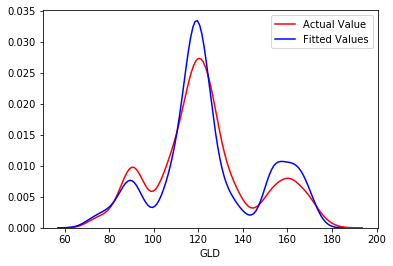

In [13]:
import seaborn as sns
ax1 = sns.distplot(train_label, hist=False, color="r", label="Actual Value")
sns.distplot(model.predict(np.array(train_data).reshape(len(train_data),4)), hist=False, color="b", label="Fitted Values" , ax=ax1)

In [14]:
timestamps = ['04/29/2019', '04/30/2019', '05/01/2019', '05/02/2019', '05/03/2019', '05/06/2019', '05/07/2019', '05/08/2019', '05/09/2019', '05/10/2019', '05/13/2019', '05/14/2019', '05/15/2019', '05/16/2019', '05/17/2019', '05/20/2019', '05/21/2019', '05/22/2019', '05/23/2019', '05/24/2019', '05/28/2019', '05/29/2019', '05/30/2019', '05/31/2019', '06/03/2019', '06/04/2019', '06/05/2019', '06/06/2019', '06/07/2019', '06/10/2019', '06/11/2019', '06/12/2019', '06/13/2019', '06/14/2019', '06/17/2019', '06/18/2019', '06/19/2019', '06/20/2019', '06/21/2019', '06/24/2019', '06/25/2019', '06/26/2019', '06/27/2019', '06/28/2019', '07/01/2019', '07/02/2019', '07/03/2019', '07/05/2019', '07/08/2019', '07/09/2019', '07/10/2019', '07/11/2019', '07/12/2019', '07/15/2019', '07/16/2019', '07/17/2019', '07/18/2019', '07/19/2019', '07/22/2019', '07/23/2019', '07/24/2019', '07/25/2019', '07/26/2019', '07/29/2019', '07/30/2019', '07/31/2019', '08/01/2019', '08/02/2019', '08/05/2019', '08/06/2019', '08/07/2019', '08/08/2019', '08/09/2019', '08/12/2019', '08/13/2019', '08/14/2019', '08/15/2019', '08/16/2019', '08/19/2019', '08/20/2019', '08/21/2019', '08/22/2019', '08/23/2019', '08/26/2019', '08/27/2019', '08/28/2019', '08/29/2019', '08/30/2019', '09/03/2019', '09/04/2019', '09/05/2019', '09/06/2019', '09/09/2019', '09/10/2019', '09/11/2019', '09/12/2019', '09/13/2019', '09/16/2019', '09/17/2019', '09/18/2019', '09/19/2019', '09/20/2019', '09/23/2019', '09/24/2019', '09/25/2019', '09/26/2019', '09/27/2019', '09/30/2019', '10/01/2019', '10/02/2019', '10/03/2019', '10/04/2019', '10/07/2019', '10/08/2019', '10/09/2019', '10/10/2019', '10/11/2019', '10/14/2019', '10/15/2019', '10/16/2019', '10/17/2019', '10/18/2019', '10/21/2019', '10/22/2019', '10/23/2019', '10/24/2019', '10/25/2019', '10/28/2019', '10/29/2019', '10/30/2019', '10/31/2019', '11/01/2019', '11/04/2019', '11/05/2019', '11/06/2019', '11/07/2019', '11/08/2019', '11/11/2019', '11/12/2019', '11/13/2019', '11/14/2019', '11/15/2019', '11/18/2019', '11/19/2019', '11/20/2019', '11/21/2019', '11/22/2019', '11/25/2019', '11/26/2019', '11/27/2019', '11/29/2019', '12/02/2019', '12/03/2019', '12/04/2019', '12/05/2019', '12/06/2019', '12/09/2019', '12/10/2019', '12/11/2019', '12/12/2019', '12/13/2019', '12/16/2019', '12/17/2019', '12/18/2019', '12/19/2019', '12/20/2019', '12/23/2019', '12/24/2019', '12/26/2019', '12/27/2019', '12/30/2019', '12/31/2019', '01/02/2020', '01/03/2020', '01/06/2020', '01/07/2020', '01/08/2020', '01/09/2020', '01/10/2020', '01/13/2020', '01/14/2020', '01/15/2020', '01/16/2020', '01/17/2020', '01/21/2020', '01/22/2020', '01/23/2020', '01/24/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/02/2020', '04/03/2020', '04/06/2020', '04/07/2020', '04/08/2020', '04/09/2020', '04/13/2020', '04/14/2020', '04/15/2020', '04/16/2020', '04/17/2020', '04/20/2020', '04/21/2020', '04/22/2020', '04/23/2020', '04/24/2020']

In [15]:
SPXdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/SPX_1y.csv', index_col=0)
# print(SPXdata.head())
# print(SPXdata.iloc[:,0])
#SPXdata.index = pd.Series.dt.strftime('%m/%d/%Y')


# Only use the open data
SPXdata = SPXdata.iloc[:,0]
print(SPXdata.head())


Date
2019-04-29    2940.580078
2019-04-30    2937.139893
2019-05-01    2952.330078
2019-05-02    2922.159912
2019-05-03    2929.209961
Name: Open, dtype: float64


In [16]:
EURdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/EURUSDX.csv', index_col=0)
# print(EURdata.head())
# print(EURdata.iloc[:,0])

# Only use the open data
EURdata = EURdata.iloc[:,0]
#print(EURdata.head())


In [17]:
USOdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/USO.csv', index_col=0)
# print(USOdata.head())
# print(USOdata.iloc[:,0])

# Only use the open data
USOdata = USOdata.iloc[:,0]
print(USOdata.head())

Date
2019-04-29    13.15
2019-04-30    13.35
2019-05-01    13.28
2019-05-02    12.92
2019-05-03    12.87
Name: Open, dtype: float64


In [18]:
GLDdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/GLD.csv', index_col=0)
# print(GLDdata.head())
# print(GLDdata.iloc[:,0])

# Only use the open data
GLDdata = GLDdata.iloc[:,0]
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [19]:
SLVdata = pd.read_csv('/kaggle/input/gold-spx-gld-uso-eurusd/SLV.csv', index_col=0)
# print(GLDdata.head())
# print(GLDdata.iloc[:,0])

# Only use the open data
SLVdata = SLVdata.iloc[:,0]
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [20]:
print(train_data.head())

                   SPX        USO    SLV   EUR/USD
Date                                              
5/5/2016   2050.629883  10.900000  16.51  1.140602
8/13/2009  1012.729980  37.799999  14.79  1.420697
2/6/2009    868.599976  28.200001  12.91  1.292708
4/20/2015  2100.399902  19.889999  15.29  1.074749
7/20/2009   951.130005  34.830002  13.45  1.419850


In [21]:
# # Transfer Timestamp format
# timestamp_lst = []
# for i in SPXdata.index:
#     timestamp_lst.append(i)
# #print((timestamp_lst))
# timestamp = pd.Series(data=timestamp_lst)
# #print(timestamp)
# timestamp = pd.to_datetime(timestamp)
# timestamp = timestamp.dt.strftime('%m/%d/%Y')
# #print(type(timestamp))
# timestamp_lst = []
# for j in timestamp:
#     timestamp_lst.append(j)
# print(timestamp_lst)

In [22]:
print(GLDdata.head())

Date
2019-04-29    120.879997
2019-04-30    120.889999
2019-05-01    121.029999
2019-05-02    119.690002
2019-05-03    120.559998
Name: Open, dtype: float64


In [23]:
# reindex datetime
GLDdata = GLDdata.reset_index(drop=True)
SPXdata = SPXdata.reset_index(drop=True)
EURdata = EURdata.reset_index(drop=True)[:251]
USOdata = USOdata.reset_index(drop=True)
SLVdata = SLVdata.reset_index(drop=True)

GLDdata.index = timestamps
SPXdata.index = timestamps
EURdata.index = timestamps
USOdata.index = timestamps
SLVdata.index = timestamps

print(type(GLDdata))
print(type(SPXdata))
print(type(EURdata))
print(type(USOdata))
print(type(SLVdata))

print(GLDdata.head())
print(SPXdata.head())
print(EURdata.head())
print(USOdata.head())
print(SLVdata.head())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
04/29/2019    120.879997
04/30/2019    120.889999
05/01/2019    121.029999
05/02/2019    119.690002
05/03/2019    120.559998
Name: Open, dtype: float64
04/29/2019    2940.580078
04/30/2019    2937.139893
05/01/2019    2952.330078
05/02/2019    2922.159912
05/03/2019    2929.209961
Name: Open, dtype: float64
04/29/2019    1.114902
04/30/2019    1.118418
05/01/2019    1.121831
05/02/2019    1.120185
05/03/2019    1.117256
Name: Open, dtype: float64
04/29/2019    13.15
04/30/2019    13.35
05/01/2019    13.28
05/02/2019    12.92
05/03/2019    12.87
Name: Open, dtype: float64
04/29/2019    14.01
04/30/2019    13.94
05/01/2019    13.89
05/02/2019    13.72
05/03/2019    13.87
Name: Open, dtype: float64


In [24]:
predition_dataset = GLDdata.to_frame()
predition_dataset = predition_dataset.rename(columns={"Open": "GLD"})
print(predition_dataset)

                   GLD
04/29/2019  120.879997
04/30/2019  120.889999
05/01/2019  121.029999
05/02/2019  119.690002
05/03/2019  120.559998
...                ...
04/20/2020  158.619995
04/21/2020  157.600006
04/22/2020  160.500000
04/23/2020  162.389999
04/24/2020  163.130005

[251 rows x 1 columns]


GLDdata
EURdata
USOdata
SPXdata

In [25]:
# GLDdata EURdata USOdata SPXdata
EURdata_lst,USOdata_lst,SPXdata_lst,SLVdata_lst = [],[],[],[]

for data in EURdata:
    # print(data)
    EURdata_lst.append(data)

for data in USOdata:
    #print(data)
    USOdata_lst.append(data)

for data in SPXdata:
    # print(data)
    SPXdata_lst.append(data)

for data in SLVdata:
    # print(data)
    SLVdata_lst.append(data)
    
#print(USOdata_lst)

In [26]:
print(train_data.head())

                   SPX        USO    SLV   EUR/USD
Date                                              
5/5/2016   2050.629883  10.900000  16.51  1.140602
8/13/2009  1012.729980  37.799999  14.79  1.420697
2/6/2009    868.599976  28.200001  12.91  1.292708
4/20/2015  2100.399902  19.889999  15.29  1.074749
7/20/2009   951.130005  34.830002  13.45  1.419850


In [27]:
# SPX        USO        SLV   EUR/USD
predition_dataset["SPX"] = SPXdata_lst
predition_dataset["USO"] = USOdata_lst
predition_dataset["SLV"] = SLVdata_lst
predition_dataset["EUR/USD"] = EURdata_lst

print(predition_dataset)

                   GLD          SPX    USO    SLV   EUR/USD
04/29/2019  120.879997  2940.580078  13.15  14.01  1.114902
04/30/2019  120.889999  2937.139893  13.35  13.94  1.118418
05/01/2019  121.029999  2952.330078  13.28  13.89  1.121831
05/02/2019  119.690002  2922.159912  12.92  13.72  1.120185
05/03/2019  120.559998  2929.209961  12.87  13.87  1.117256
...                ...          ...    ...    ...       ...
04/20/2020  158.619995  2845.620117   3.76  14.20  1.080194
04/21/2020  157.600006  2784.810059   3.19  13.66  1.089431
04/22/2020  160.500000  2787.889893   2.90  14.01  1.086118
04/23/2020  162.389999  2810.419922   2.68  14.25  1.092598
04/24/2020  163.130005  2812.639893   2.69  14.28  1.093135

[251 rows x 5 columns]


In [28]:
print(predition_dataset)
pre_label = predition_dataset.iloc[:,0]
predition_dataset.drop(predition_dataset.columns[0], axis=1, inplace=True)

print(pre_label)
print(predition_dataset)


                   GLD          SPX    USO    SLV   EUR/USD
04/29/2019  120.879997  2940.580078  13.15  14.01  1.114902
04/30/2019  120.889999  2937.139893  13.35  13.94  1.118418
05/01/2019  121.029999  2952.330078  13.28  13.89  1.121831
05/02/2019  119.690002  2922.159912  12.92  13.72  1.120185
05/03/2019  120.559998  2929.209961  12.87  13.87  1.117256
...                ...          ...    ...    ...       ...
04/20/2020  158.619995  2845.620117   3.76  14.20  1.080194
04/21/2020  157.600006  2784.810059   3.19  13.66  1.089431
04/22/2020  160.500000  2787.889893   2.90  14.01  1.086118
04/23/2020  162.389999  2810.419922   2.68  14.25  1.092598
04/24/2020  163.130005  2812.639893   2.69  14.28  1.093135

[251 rows x 5 columns]
04/29/2019    120.879997
04/30/2019    120.889999
05/01/2019    121.029999
05/02/2019    119.690002
05/03/2019    120.559998
                 ...    
04/20/2020    158.619995
04/21/2020    157.600006
04/22/2020    160.500000
04/23/2020    162.389999
04/24/

In [29]:
print((predition_dataset))
#print(np.array(pre_label))

                    SPX    USO    SLV   EUR/USD
04/29/2019  2940.580078  13.15  14.01  1.114902
04/30/2019  2937.139893  13.35  13.94  1.118418
05/01/2019  2952.330078  13.28  13.89  1.121831
05/02/2019  2922.159912  12.92  13.72  1.120185
05/03/2019  2929.209961  12.87  13.87  1.117256
...                 ...    ...    ...       ...
04/20/2020  2845.620117   3.76  14.20  1.080194
04/21/2020  2784.810059   3.19  13.66  1.089431
04/22/2020  2787.889893   2.90  14.01  1.086118
04/23/2020  2810.419922   2.68  14.25  1.092598
04/24/2020  2812.639893   2.69  14.28  1.093135

[251 rows x 4 columns]


In [30]:
model.evaluate(np.array(predition_dataset), np.array(pre_label))

251/251 [==============================] - 0s 261us/sample - loss: nan - mean_absolute_error: nan


[nan, nan]

In [31]:
predictions = model.predict(np.array(predition_dataset)[:20])
print('predictions:', predictions)

predictions: [[122.56567 ]
 [122.36366 ]
 [122.49386 ]
 [121.52434 ]
 [122.11158 ]
 [121.71176 ]
 [122.0428  ]
 [121.31842 ]
 [120.25228 ]
 [120.49158 ]
 [119.98052 ]
 [119.534874]
 [119.59901 ]
 [120.200516]
 [119.33629 ]
 [118.899315]
 [119.17237 ]
 [       nan]
 [119.15698 ]
 [119.2299  ]]


In [36]:
prediction_lst = []
for j in range(0,10):
    print(model.predict(np.array(predition_dataset.iloc[j,:]).reshape(1,4)))
    prediction_lst.append(model.predict(np.array(predition_dataset.iloc[j,:]).reshape(1,4)))
    

for k in range (len(prediction_lst)):
    prediction_lst[k] = prediction_lst[k][0][0]
print(prediction_lst)

[[122.565674]]
[[122.36366]]
[[122.493866]]
[[121.52434]]
[[122.11158]]
[[121.71176]]
[[122.0428]]
[[121.318436]]
[[120.25227]]
[[120.491585]]
[122.565674, 122.36366, 122.493866, 121.52434, 122.11158, 121.71176, 122.0428, 121.318436, 120.25227, 120.491585]


In [40]:
pre_check_label = pd.Series(prediction_lst)

IndexError: tuple index out of range

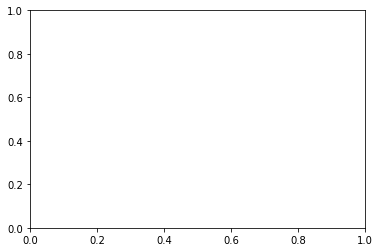

In [41]:
p = plt.plot([0,1,2,3,4,5,6,7,8,9], pre_check_label.values)